# **NIFTY 500 COMPANIES - DATA ANALYSIS**

 Nifty 500 is an index maintained by the National Stock Exchange of India (NSE). The Nifty 500 is designed to represent the performance of the 500 largest publicly traded companies listed on the NSE, spanning various sectors of the Indian economy. Nifty 500 includes stocks from large, mid, and small-cap segments, providing a comprehensive view of the overall market.



In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
# Set working directory
%cd /content/drive/MyDrive/CVA/

/content/drive/MyDrive/CVA


#**Basics of Dataset**

In [113]:
# Include Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
df_nifty = pd.read_csv('nifty_500_quarterly_results new.csv')

In [115]:
df_nifty.head()

,name,NSE_code,BSE_code,sector,industry,revenue,operating_expenses,operating_profit,operating_profit_margin,depreciation,interest,profit_before_tax,tax,net_profit,EPS,profit_TTM,EPS_TTM
0,3M India Ltd.,3MINDIA,523395,GENERAL INDUSTRIALS,INDUSTRIAL MACHINERY,"1,057",847.4,192.1,18.48%,12.9,0.7,195.9,49.8,146.1,129.7,535.9,475.7
1,ACC Ltd.,ACC,500410,CEMENT AND CONSTRUCTION,CEMENT & CEMENT PRODUCTS,"4,644.8","3,885.4",549.3,12.39%,212.8,28.9,517.7,131.5,387.9,20.7,"1,202.7",64.0
2,AIA Engineering Ltd.,AIAENG,532683,GENERAL INDUSTRIALS,OTHER INDUSTRIAL GOODS,"1,357.1",912.7,382.1,29.51%,24.5,7.4,412.5,88.4,323.1,34.3,"1,216.1",128.9
3,APL Apollo Tubes Ltd.,APLAPOLLO,533758,METALS & MINING,IRON & STEEL PRODUCTS,"4,65","4,305.4",325,7.02%,41.3,26.6,276.7,73.8,202.9,7.3,767.5,27.7
4,Au Small Finance Bank Ltd.,AUBANK,540611,BANKING AND FINANCE,BANKS,"2,956.5","1,026.7",647.7,25.59%,0,"1,282.1",533.4,131.5,401.8,6.0,"1,606.2",24.0


In [116]:
print(df_nifty.isnull().sum())

name                       0
NSE_code                   0
BSE_code                   0
sector                     0
industry                   0
revenue                    1
operating_expenses         1
operating_profit           1
operating_profit_margin    1
depreciation               1
interest                   1
profit_before_tax          1
tax                        1
net_profit                 1
EPS                        1
profit_TTM                 3
EPS_TTM                    3
dtype: int64


In [117]:
df_nifty.dropna(inplace=True)

In [118]:
print(df_nifty.isnull().sum())

name                       0
NSE_code                   0
BSE_code                   0
sector                     0
industry                   0
revenue                    0
operating_expenses         0
operating_profit           0
operating_profit_margin    0
depreciation               0
interest                   0
profit_before_tax          0
tax                        0
net_profit                 0
EPS                        0
profit_TTM                 0
EPS_TTM                    0
dtype: int64


In [119]:
df_nifty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     498 non-null    object 
 1   NSE_code                 498 non-null    object 
 2   BSE_code                 498 non-null    object 
 3   sector                   498 non-null    object 
 4   industry                 498 non-null    object 
 5   revenue                  498 non-null    object 
 6   operating_expenses       498 non-null    object 
 7   operating_profit         498 non-null    object 
 8   operating_profit_margin  498 non-null    object 
 9   depreciation             498 non-null    object 
 10  interest                 498 non-null    object 
 11  profit_before_tax        498 non-null    object 
 12  tax                      498 non-null    object 
 13  net_profit               498 non-null    object 
 14  EPS                      4

***Size of your dataset (number of features and observations)***




In [120]:
print("Size of the dataset =",df_nifty.size)

Size of the dataset = 8466


In [121]:
row, column = df_nifty.shape
print("Row size =",row)
print("Column size =",column)

Row size = 498
Column size = 17


In [122]:
numeric_columns = ['revenue', 'operating_expenses', 'operating_profit', 'depreciation', 'interest',
                   'profit_before_tax', 'tax', 'net_profit', 'profit_TTM']

df_nifty[numeric_columns] = df_nifty[numeric_columns].replace({',': ''}, regex=True).apply(pd.to_numeric)

# Convert 'operating_profit_margin' column to float after removing '%' sign
df_nifty['operating_profit_margin'] = df_nifty['operating_profit_margin'].replace('%', '', regex=True).astype('float') / 100.0

In [123]:
df_nifty.head()

,name,NSE_code,BSE_code,sector,industry,revenue,operating_expenses,operating_profit,operating_profit_margin,depreciation,interest,profit_before_tax,tax,net_profit,EPS,profit_TTM,EPS_TTM
0,3M India Ltd.,3MINDIA,523395,GENERAL INDUSTRIALS,INDUSTRIAL MACHINERY,1057.0,847.4,192.1,0.1848,12.9,0.7,195.9,49.8,146.1,129.7,535.9,475.7
1,ACC Ltd.,ACC,500410,CEMENT AND CONSTRUCTION,CEMENT & CEMENT PRODUCTS,4644.8,3885.4,549.3,0.1239,212.8,28.9,517.7,131.5,387.9,20.7,1202.7,64.0
2,AIA Engineering Ltd.,AIAENG,532683,GENERAL INDUSTRIALS,OTHER INDUSTRIAL GOODS,1357.1,912.7,382.1,0.2951,24.5,7.4,412.5,88.4,323.1,34.3,1216.1,128.9
3,APL Apollo Tubes Ltd.,APLAPOLLO,533758,METALS & MINING,IRON & STEEL PRODUCTS,465.0,4305.4,325.0,0.0702,41.3,26.6,276.7,73.8,202.9,7.3,767.5,27.7
4,Au Small Finance Bank Ltd.,AUBANK,540611,BANKING AND FINANCE,BANKS,2956.5,1026.7,647.7,0.2559,0.0,1282.1,533.4,131.5,401.8,6.0,1606.2,24.0


In [124]:
df_nifty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     498 non-null    object 
 1   NSE_code                 498 non-null    object 
 2   BSE_code                 498 non-null    object 
 3   sector                   498 non-null    object 
 4   industry                 498 non-null    object 
 5   revenue                  498 non-null    float64
 6   operating_expenses       498 non-null    float64
 7   operating_profit         498 non-null    float64
 8   operating_profit_margin  498 non-null    float64
 9   depreciation             498 non-null    float64
 10  interest                 498 non-null    float64
 11  profit_before_tax        498 non-null    float64
 12  tax                      498 non-null    float64
 13  net_profit               498 non-null    float64
 14  EPS                      4

***Summary statistics of the dataset***

In [140]:
summary_stats = df_nifty.describe()
summary_stats

,revenue,operating_expenses,operating_profit,operating_profit_margin,depreciation,interest,profit_before_tax,tax,net_profit,EPS,profit_TTM,EPS_TTM
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,7354.908434,5499.730924,1393.766466,0.217703,238.174297,816.297590,906.342570,246.643574,658.894177,15.299197,2554.334137,54.043775
std,21600.788139,17777.082278,3756.394648,0.302900,941.516430,3990.998666,2708.599941,778.672792,2055.168246,66.242224,7409.256260,193.529196
min,-167.200000,-180.100000,-508.100000,-4.318700,0.000000,0.000000,-7919.000000,-1370.600000,-8737.900000,-32.400000,-30986.800000,-214.800000
25%,780.525000,546.275000,121.275000,0.117000,14.450000,5.400000,82.675000,17.625000,62.425000,2.100000,260.250000,8.900000
50%,1699.650000,1204.650000,285.500000,0.182650,41.200000,24.250000,206.200000,48.950000,155.250000,5.350000,587.000000,22.400000
75%,4420.600000,3186.350000,822.750000,0.280225,101.275000,139.425000,594.175000,130.100000,420.850000,14.200000,1602.125000,52.675000
max,238797.000000,193988.000000,40968.000000,1.042100,12585.000000,62955.200000,26493.000000,9092.000000,17394.000000,1383.300000,69304.100000,3988.000000


# **Distribution of Dataset**

***Box and whisker plot of an important numerical variable***

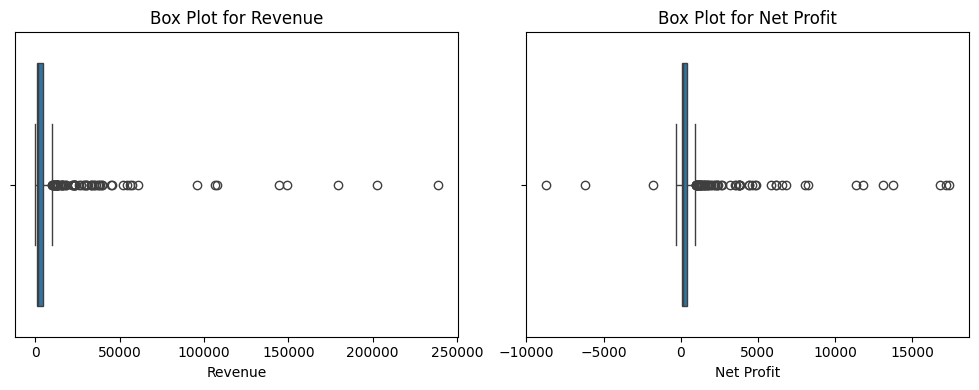

In [126]:
plt.figure(figsize=(15, 4))

# Subplot 1: Box plot for revenue
plt.subplot(1, 3, 1)
sns.boxplot(x='revenue', data=df_nifty)
plt.title('Box Plot for Revenue')
plt.xlabel('Revenue')

# Subplot 2: Box plot for net profit
plt.subplot(1, 3, 2)
sns.boxplot(x='net_profit', data=df_nifty)
plt.title('Box Plot for Net Profit')
plt.xlabel('Net Profit')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

***Correlation matrix of all numerical variables***

In [127]:
correlation_data = df_nifty.corr()
correlation_data

<ipython-input-127-9cb4344c4fd4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_data = df_nifty.corr()


,revenue,operating_expenses,operating_profit,operating_profit_margin,depreciation,interest,profit_before_tax,tax,net_profit,EPS,profit_TTM,EPS_TTM
revenue,1.000000,0.944802,0.817100,-0.015156,0.634544,0.451826,0.826063,0.742428,0.789379,0.012847,0.827735,0.017514
operating_expenses,0.944802,1.000000,0.708502,-0.061164,0.633015,0.214166,0.721323,0.650437,0.689185,0.015280,0.722857,0.019832
operating_profit,0.817100,0.708502,1.000000,0.150436,0.700367,0.582078,0.887461,0.830746,0.831617,0.016774,0.858414,0.022618
operating_profit_margin,-0.015156,-0.061164,0.150436,1.000000,0.032550,0.100520,0.084767,0.071154,0.083338,0.024897,0.083585,0.031863
depreciation,0.634544,0.633015,0.700367,0.032550,1.000000,0.088291,0.500452,0.580777,0.398027,0.003815,0.438441,0.007713
interest,0.451826,0.214166,0.582078,0.100520,0.088291,1.000000,0.613488,0.535144,0.589294,-0.004310,0.612719,-0.002303
profit_before_tax,0.826063,0.721323,0.887461,0.084767,0.500452,0.613488,1.000000,0.863087,0.940744,0.032921,0.936434,0.035549
tax,0.742428,0.650437,0.830746,0.071154,0.580777,0.535144,0.863087,1.000000,0.708752,0.017327,0.748907,0.021130
net_profit,0.789379,0.689185,0.831617,0.083338,0.398027,0.589294,0.940744,0.708752,1.000000,0.040062,0.975226,0.043815
EPS,0.012847,0.015280,0.016774,0.024897,0.003815,-0.004310,0.032921,0.017327,0.040062,1.000000,0.031115,0.989532


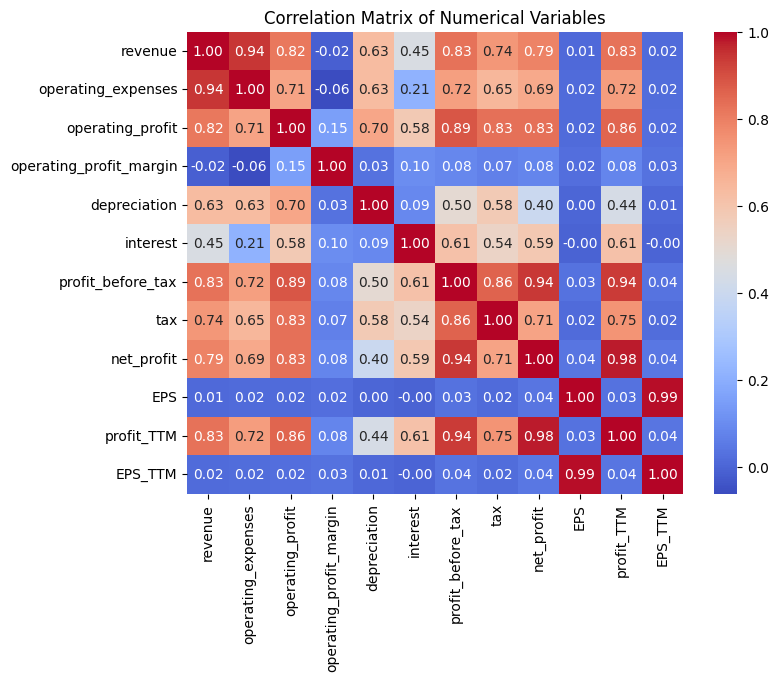

In [128]:
numerical_columns = df_nifty.select_dtypes(include=['float64']).columns

# Calculate the correlation matrix
correlation_matrix = df_nifty[numerical_columns].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Several correlations are observed in the dataset which are highlighted in the heatmap:

1)**EPS_TTM vs EPS:**
A strong correlation is observed between EPS_TTM and EPS, with a correlation coefficient of 0.99, indicating a close-to-perfect positive correlation. Consequently, the revenue range shows a corresponding increase in line with operating expenses.

2)**Revenue vs Operating Expenses:**
A similar pattern is identified in the correlation between Revenue and Operating Expenses with a correlation coefficient of 0.94. This signifies a strong positive correlation between the two variables.

3)**Profit_TTM vs Net Profit:**
Likewise, a notable correlation with a coefficient of 0.98 is found between Profit_TTM and net profit, indicating a strong positive relationship.

4)**Profit_before_tax vs Net Profit:**
The correlation factor between Profit_before_tax and net profit is determined to be 0.94, signifying a positive correlation between these two metrics.


***Histogram to show distribution of a numerical variable***


Visualizing Net profit, Profit before tax and revenue distribution

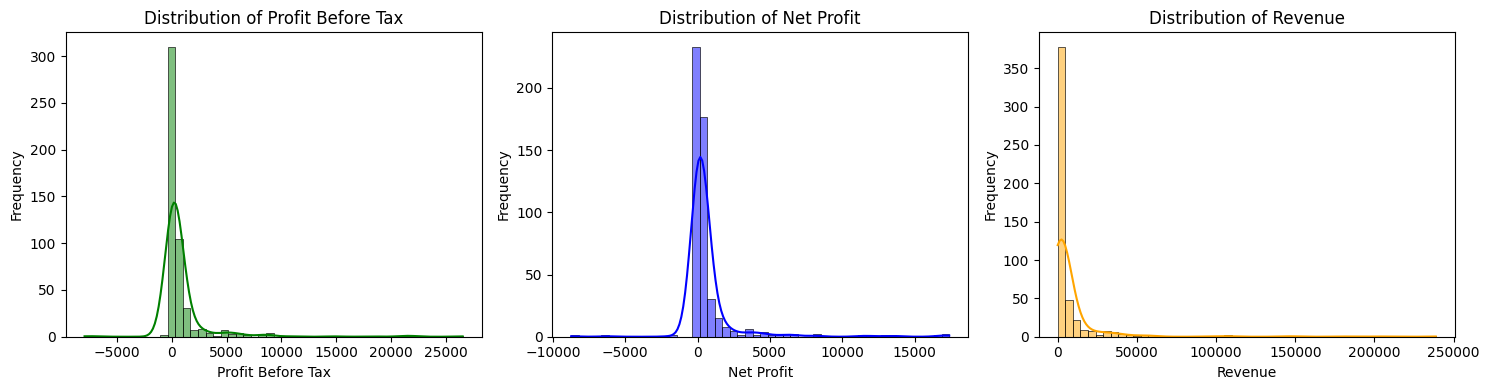

In [129]:
plt.figure(figsize=(15, 4))

# Subplot 1: Histogram for 'profit_before_tax'
plt.subplot(1, 3, 1)
sns.histplot(df_nifty['profit_before_tax'], bins=50, kde=True, color='green', stat='count')
plt.title('Distribution of Profit Before Tax')
plt.xlabel('Profit Before Tax')
plt.ylabel('Frequency')

# Subplot 2: Histogram for 'net_profit'
plt.subplot(1, 3, 2)
sns.histplot(df_nifty['net_profit'], bins=50, kde=True, color='blue', stat='count')
plt.title('Distribution of Net Profit')
plt.xlabel('Net Profit')
plt.ylabel('Frequency')

# Subplot 3: Histogram for 'revenue'
plt.subplot(1, 3, 3)
sns.histplot(df_nifty['revenue'], bins=50, kde=True, color='orange', stat='count')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

***Violin plot to compare the variables***

visualizing revenue, operating_expenses and operating_profit



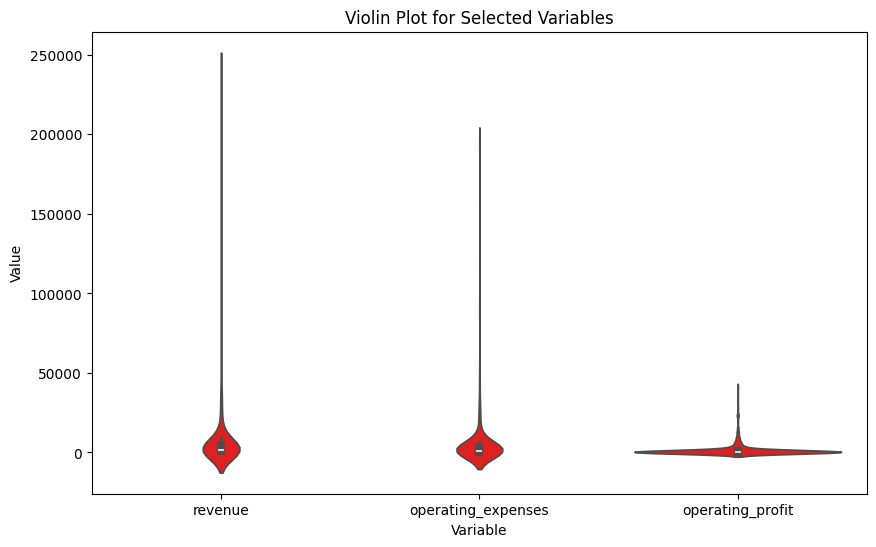

In [130]:
selected_columns = ['revenue', 'operating_expenses', 'operating_profit']
df_selected = df_nifty[selected_columns]
df_melted = df_selected.melt(var_name='Variable', value_name='Value')

plt.figure(figsize=(10, 6))
sns.violinplot(x='Variable', y='Value', data=df_melted,color='red')
plt.title('Violin Plot for Selected Variables')
plt.xlabel('Variable')
plt.ylabel('Value')

# Set y-axis limits using ax.set_ylim
#plt.ylim(-100, 15000)
plt.show()

***Jointplot for Revenue and Profit Before Tax***

<Figure size 800x400 with 0 Axes>

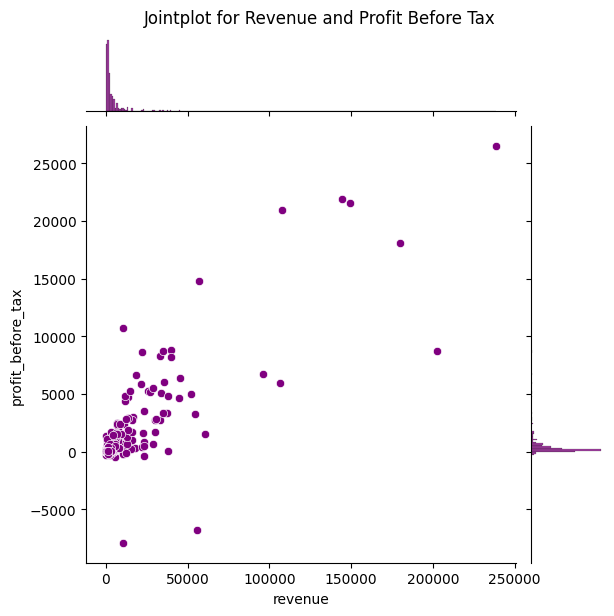

In [131]:
plt.figure(figsize=(8, 4))
sns.jointplot(x='revenue', y='profit_before_tax', data=df_nifty, kind='scatter', color='purple')
plt.suptitle('Jointplot for Revenue and Profit Before Tax', y=1.02)
plt.show()

# **Aggregation of Categorical Data**

***Bar chart or pie chart of the sum of one numerical value in relation to one categorical variable***

***Distribution of Companies Across Sectors***



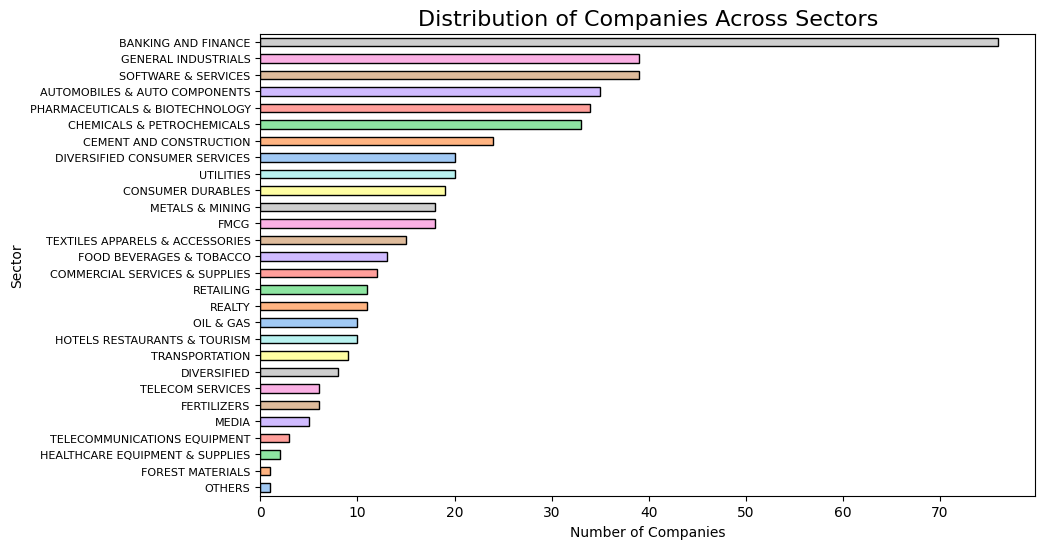

In [132]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette("pastel")
sector_counts = df_nifty['sector'].value_counts()
sector_counts.sort_values().plot(kind='barh', color=colors, edgecolor='black')
plt.title('Distribution of Companies Across Sectors', fontsize=16)
plt.xlabel('Number of Companies', fontsize=10)
plt.ylabel('Sector', fontsize=10)
plt.yticks(fontsize=8)
plt.xticks(fontsize=10)
plt.show()

***Scatterplot with more than 2 visual encodings***

Scatterplot of Revenue vs. Profit Before Tax with Industry Count Aggregation

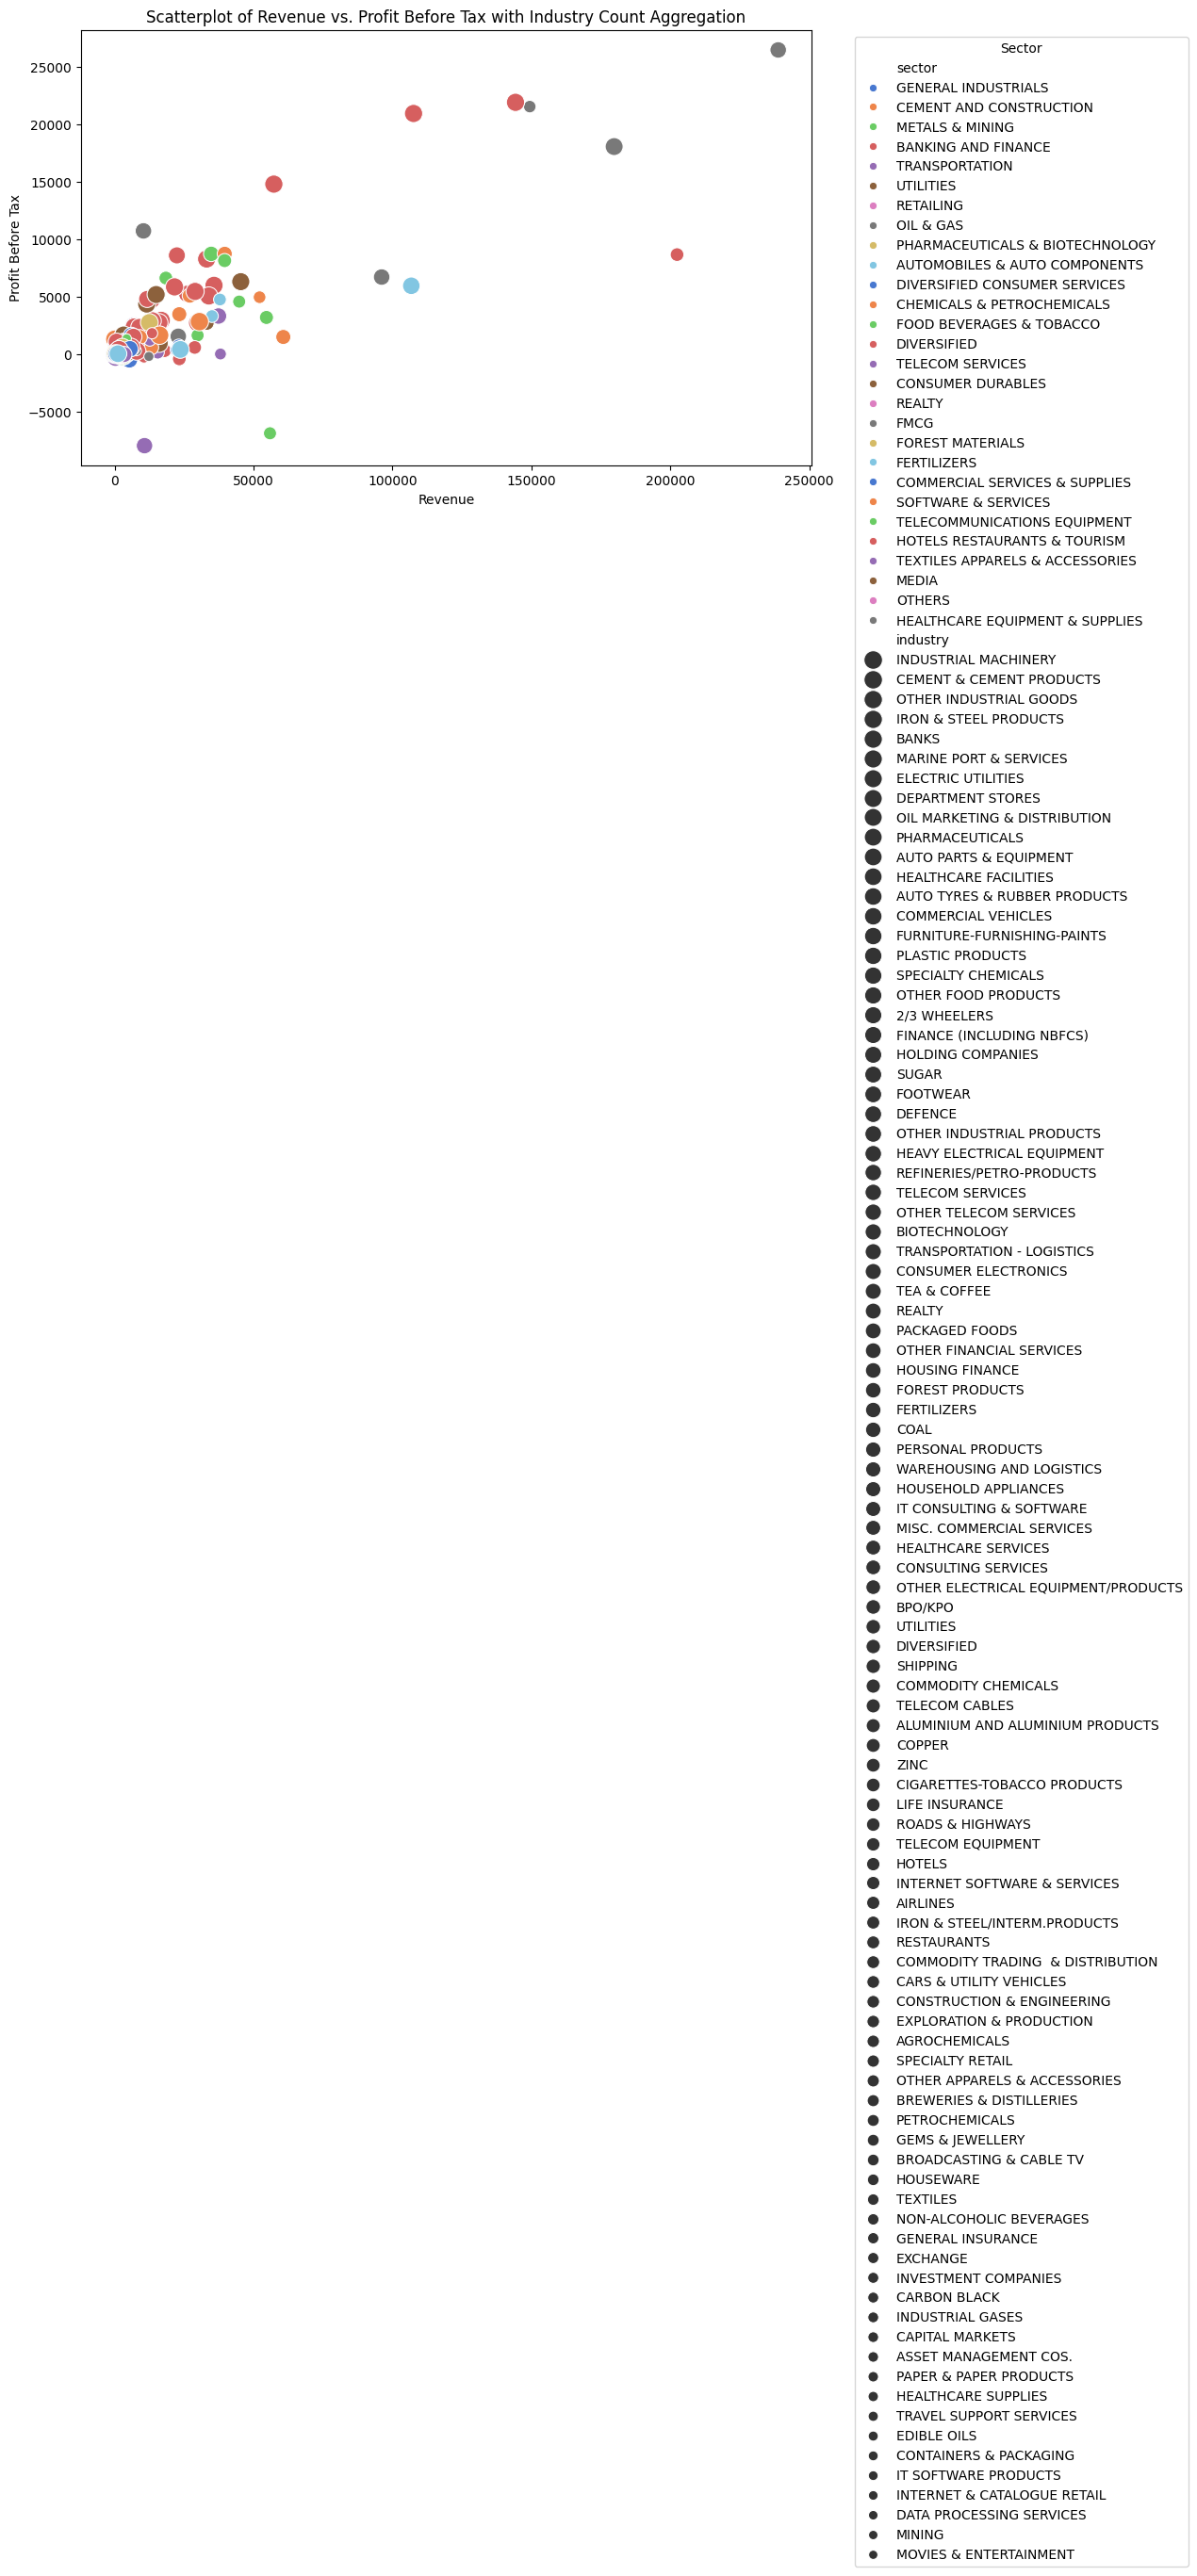

In [133]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='revenue', y='profit_before_tax', hue='sector', size='industry', data=df_nifty, sizes=(50, 200), palette='muted')
plt.title('Scatterplot of Revenue vs. Profit Before Tax with Industry Count Aggregation')
plt.xlabel('Revenue')
plt.ylabel('Profit Before Tax')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Area Plot**

***Sector-wise Performance Overview*** : Presenting Average EPS values across different sectors

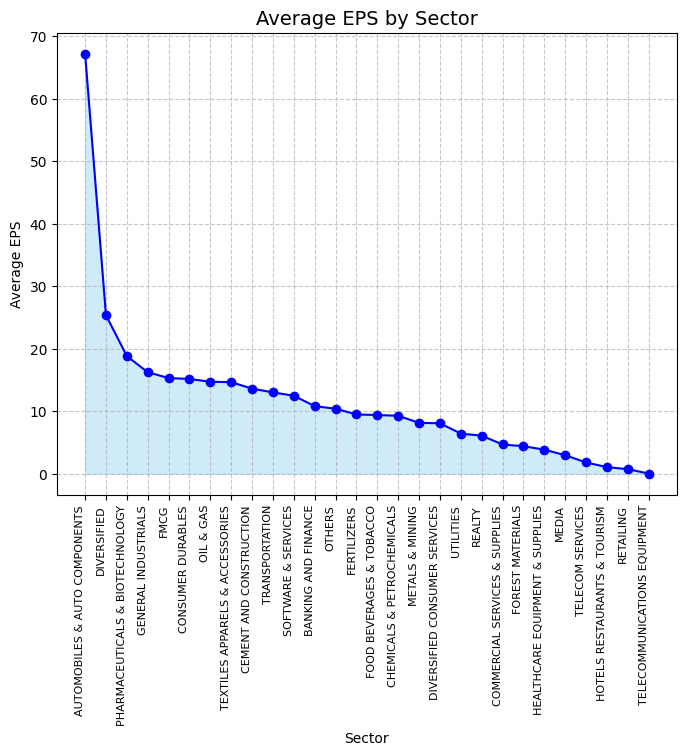

In [134]:
average_eps = df_nifty.groupby('sector')['EPS'].mean().reset_index()
average_eps = average_eps.sort_values(by='EPS', ascending=False)

# Plot area chart
plt.figure(figsize=(8, 6))
plt.fill_between(average_eps['sector'], average_eps['EPS'], color='skyblue', alpha=0.4)
plt.plot(average_eps['sector'], average_eps['EPS'], color='blue', marker='o')
plt.title('Average EPS by Sector', fontsize=14)
plt.xlabel('Sector', fontsize=10)
plt.ylabel('Average EPS', fontsize=10)
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

***Financial Health Assessment*** :
Visualizing Operating Profit, net profit and EPS altogether sector wise in the form of bar plot

<ipython-input-135-e12345526ade>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sector', y='value', hue='Metrics', data=df_nifty_melted, ci=None, edgecolor='black')


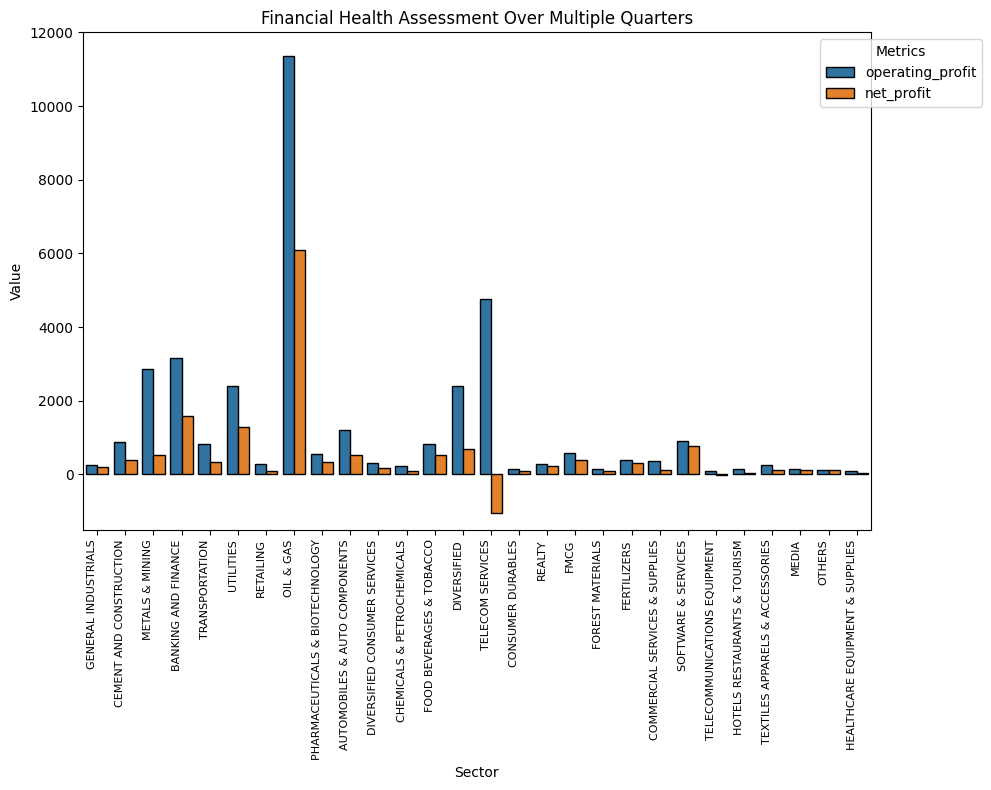

In [135]:
# Bar plot for financial health assessment
plt.figure(figsize=(10, 8))
df_nifty_melted = df_nifty.melt(id_vars=['sector'], value_vars=['operating_profit', 'net_profit'], var_name='Metrics')
sns.barplot(x='sector', y='value', hue='Metrics', data=df_nifty_melted, ci=None, edgecolor='black')
plt.title('Financial Health Assessment Over Multiple Quarters')
plt.xlabel('Sector')
plt.ylabel('Value')
plt.legend(title='Metrics', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=90, ha='right', fontsize=8)  # Rotate x-axis labels for better readability
plt.ylim(-1500, 12000)
plt.tight_layout()
plt.show()


<ipython-input-136-a1a93b40197c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sector', y='value', hue='Metrics', data=df_nifty_melted, ci=None, edgecolor='black')


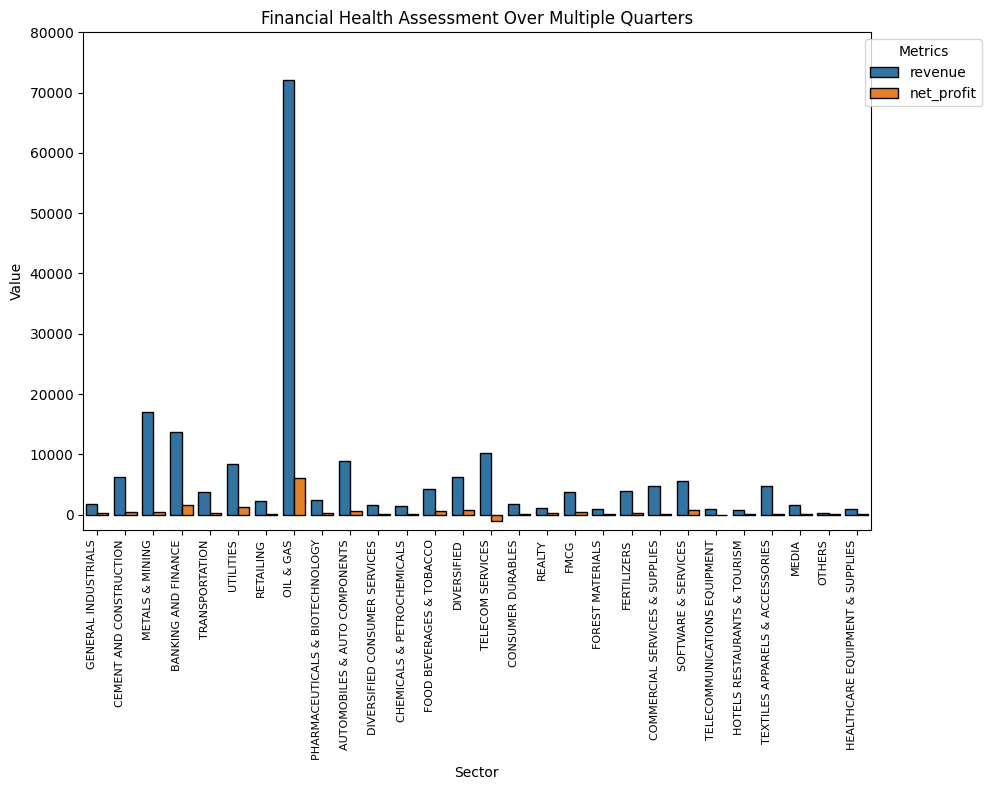

In [136]:
plt.figure(figsize=(10, 8))
df_nifty_melted = df_nifty.melt(id_vars=['sector'], value_vars=['revenue', 'net_profit'], var_name='Metrics')
sns.barplot(x='sector', y='value', hue='Metrics', data=df_nifty_melted, ci=None, edgecolor='black')
plt.title('Financial Health Assessment Over Multiple Quarters')
plt.xlabel('Sector')
plt.ylabel('Value')
plt.legend(title='Metrics', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=90, ha='right', fontsize=8)  # Rotate x-axis labels for better readability
plt.ylim(-2500, 80000)
plt.tight_layout()
plt.show()

<ipython-input-137-6671847f0a7c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='name', data=top_5_revenues, palette='Blues_d', edgecolor='black')
<ipython-input-137-6671847f0a7c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='net_profit', y='name', data=top_5_net_profit, palette='Greens_d', edgecolor='black')
<ipython-input-137-6671847f0a7c>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='operating_profit', y='name', data=top_5_operating_profit, palette='Oranges_d', edgecolor='black')


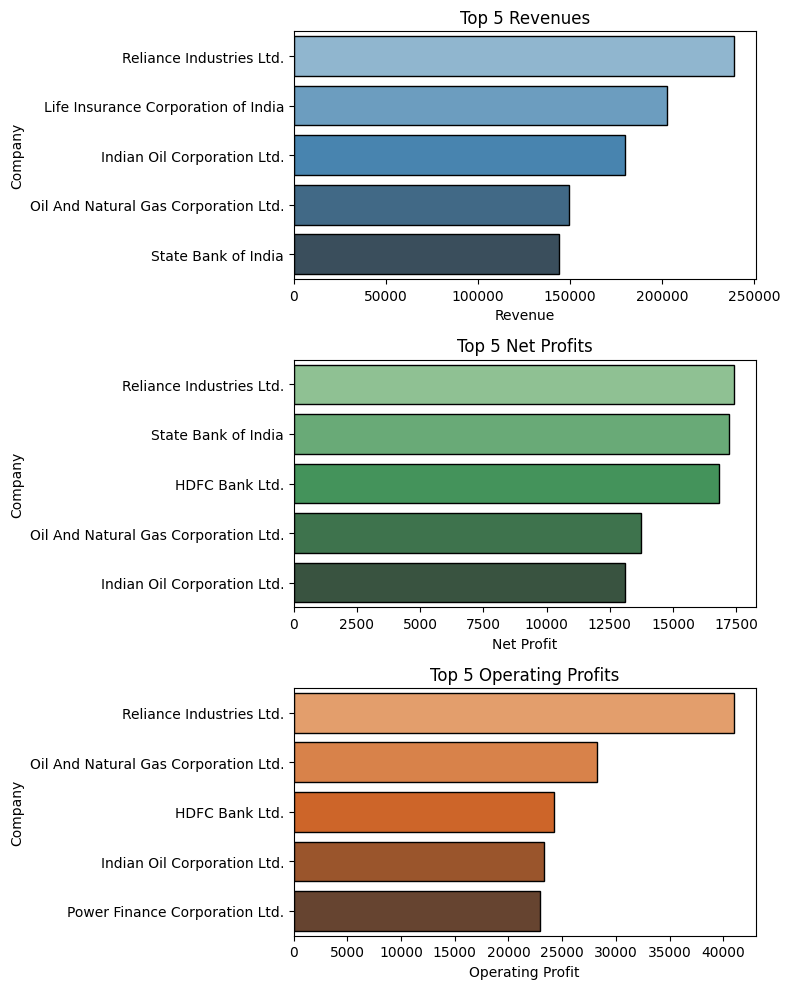

In [137]:
top_5_revenues = df_nifty.nlargest(5, 'revenue')
top_5_net_profit = df_nifty.nlargest(5, 'net_profit')
top_5_operating_profit = df_nifty.nlargest(5, 'operating_profit')

plt.figure(figsize=(8, 10))

# Bar plot for top 5 revenues
plt.subplot(3, 1, 1)
sns.barplot(x='revenue', y='name', data=top_5_revenues, palette='Blues_d', edgecolor='black')
plt.title('Top 5 Revenues')
plt.xlabel('Revenue')
plt.ylabel('Company')

# Bar plot for top 5 net profits
plt.subplot(3, 1, 2)
sns.barplot(x='net_profit', y='name', data=top_5_net_profit, palette='Greens_d', edgecolor='black')
plt.title('Top 5 Net Profits')
plt.xlabel('Net Profit')
plt.ylabel('Company')

# Bar plot for top 5 operating profits
plt.subplot(3, 1, 3)
sns.barplot(x='operating_profit', y='name', data=top_5_operating_profit, palette='Oranges_d', edgecolor='black')
plt.title('Top 5 Operating Profits')
plt.xlabel('Operating Profit')
plt.ylabel('Company')

plt.tight_layout()
plt.show()


***Top Performers in Each Sector [Operating profit] wise***

<ipython-input-138-e9a89779db21>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='operating_profit', y='sector', data=top_performers_data, ci=None, palette='muted', edgecolor='black')
<ipython-input-138-e9a89779db21>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='operating_profit', y='sector', data=top_performers_data, ci=None, palette='muted', edgecolor='black')


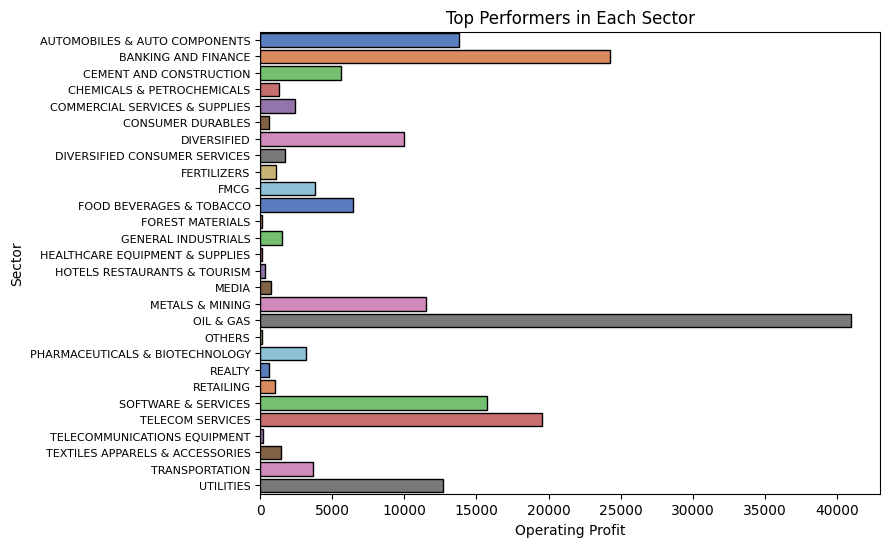

In [138]:
top_performers = df_nifty.groupby('sector')['operating_profit'].idxmax()
top_performers_data = df_nifty.loc[top_performers]

plt.figure(figsize=(8, 6))
sns.barplot(x='operating_profit', y='sector', data=top_performers_data, ci=None, palette='muted', edgecolor='black')
plt.title('Top Performers in Each Sector')
plt.xlabel('Operating Profit')
plt.ylabel('Sector')
plt.yticks(fontsize=8)
plt.xticks(fontsize=10)
plt.show()

***Insights and Trends***

1) Overall, ***Reliance Industries*** have higher operating profit, net profit and revenues when compared to other industries

2) Revenue and Operating profit tends to be more in "***Oil and Gas***" sectors when compared to other sectors

3) For the "***Telecom Services***" sector "net profit" seems to be in negative side whereas the operating profit seems to have positive value

4) From the Area plot it is evident that "**The Automobile and Auto components**" tend to have more "***EPS***" when compared to other sectors.

***EPS*** : The portion of a company's profit allocated to each outstanding share of common stock, providing a measure of profitability on a per-share basis.

5)The presence of negative values in the "**Profit before tax**" and "**Net Profit**" columns implies that these industries underwent operational losses during the observed period.

6)"**Revenue**" exhibits a wide range, extending from negative values to extremely high figures, with some reaching nearly 250,000. Also, we could notice wide range in operating profit and net profit

7) "**Banking & Fincance**" sectors recorded more number of industries when compared to other sectors
